# Proyecto de Análisis de Datos: Tienda de Videojuegos Ice

## Introducción
En este proyecto, llevaremos a cabo un análisis de datos para la tienda online Ice, la cual se dedica a la venta de videojuegos a nivel mundial. Con el objetivo de identificar patrones que determinen el éxito de un juego, utilizaremos datos históricos sobre ventas, reseñas de usuarios y expertos, géneros y plataformas de lanzamiento.

El conjunto de datos proporcionado contiene información desde 2016, y nuestro objetivo será extraer conocimientos que permitan detectar proyectos prometedores y planificar campañas publicitarias efectivas para el año siguiente, en este caso, para el año 2017.

A lo largo de este análisis, abordaremos varias etapas, comenzando con la preparación de los datos, donde limpiaremos y formatearemos el conjunto de datos para su análisis. Luego, realizaremos un análisis exploratorio detallado para comprender mejor las tendencias en la industria de los videojuegos, incluyendo el análisis de ventas por plataforma, género y región.

Posteriormente, crearemos perfiles de usuario para diferentes regiones, lo que nos permitirá adaptar estrategias de marketing según las preferencias locales. También pondremos a prueba algunas hipótesis relacionadas con las características de los juegos y su recepción por parte de los usuarios.

Finalmente, resumiremos nuestras conclusiones y recomendaciones basadas en los hallazgos obtenidos a lo largo del análisis.

Este proyecto nos brindará una valiosa experiencia en el trabajo con datos y nos permitirá aplicar técnicas de análisis de datos para comprender mejor el mercado de los videojuegos y optimizar las estrategias comerciales de la tienda Ice.



### Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, levene

### Cargar datos

In [2]:
import pandas as pd

data = pd.read_csv("/datasets/games.csv")

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Aquí hay una descripción breve de lo que cada columna representa:

Name: Nombre del videojuego.
Platform: Plataforma en la que se lanzó el videojuego (por ejemplo, Wii, NES, PS3).
Year_of_Release: Año de lanzamiento del videojuego.
Genre: Género del videojuego (por ejemplo, Deportes, Plataforma, Carreras).
NA_sales: Ventas en América del Norte en millones de dólares estadounidenses.
EU_sales: Ventas en Europa en millones de dólares estadounidenses.
JP_sales: Ventas en Japón en millones de dólares estadounidenses.
Other_sales: Ventas en otras regiones en millones de dólares estadounidenses.
Critic_Score: Puntuación de los críticos para el videojuego (máximo de 100).
User_Score: Puntuación de los usuarios para el videojuego (máximo de 10).
Rating: Clasificación ESRB del videojuego (por ejemplo, E para todos, T para adolescentes, M para adultos).

## Preparacion de datos

### Corregir los datos

In [3]:
# Reemplazar los nombres de las columnas por minúsculas
data.columns = data.columns.str.lower()

In [4]:
# Reemplazar los valores 'TBD' (to be determined) en la columna 'user_score' con NaN y convertir la columna a tipo float
data['user_score'] = pd.to_numeric(data['user_score'].replace('TBD', pd.NA), errors='coerce')

# Convertir la columna 'year_of_release' a tipo de dato entero
data['year_of_release'] = data['year_of_release'].astype('Int64')

# Convertir las columnas de ventas a tipo de dato float
columns_to_convert = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data[columns_to_convert] = data[columns_to_convert].astype(float)

1. Reemplazar los valores 'TBD' (to be determined) en la columna 'user_score' con NaN y convertir la columna a tipo float:
Primero, usamos el método replace() para reemplazar todos los valores 'TBD' en la columna 'user_score' con NaN. Esto se hace con el fin de tratar los valores 'TBD' como valores faltantes.
Luego, utilizamos pd.to_numeric() para convertir la columna 'user_score' al tipo de dato float. La opción errors='coerce' se usa para forzar la conversión de valores no numéricos a NaN. Esto garantiza que los valores 'TBD' se conviertan en NaN y que el resto de la columna se convierta correctamente a valores numéricos de tipo float.

2. Convertir la columna 'year_of_release' a tipo de dato entero:
Utilizamos el método astype() para convertir la columna 'year_of_release' al tipo de dato entero 'Int64'. Esto permite trabajar con los años como valores enteros en lugar de valores de punto flotante, lo que es más apropiado para representar años.

3. Convertir las columnas de ventas a tipo de dato float:
Definimos una lista llamada columns_to_convert que contiene los nombres de las columnas de ventas que queremos convertir.
Usamos el método astype() para convertir las columnas especificadas en la lista a tipo de dato float. Esto nos permite realizar operaciones aritméticas con las ventas, ya que los valores numéricos son más adecuados que los valores de cadena para este propósito.

In [5]:
# Rellenar los valores ausentes en las columnas de puntuaciones con 'unknown'
data['critic_score'].fillna('unknown', inplace=True)
data['user_score'].fillna('unknown', inplace=True)

In [6]:
# Calcular las ventas totales para cada juego y agregar una nueva columna 'total_sales'
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [7]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unknown,unknown,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,unknown,unknown,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,unknown,unknown,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,unknown,unknown,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,unknown,unknown,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,unknown,unknown,NaN,0.01


In [8]:
# Verificar datos faltantes en el DataFrame
missing_data = data.isnull().sum()
print(missing_data)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
total_sales           0
dtype: int64


Se realizaron correcciones en los datos para mejorar su integridad y calidad. Inicialmente, se ajustaron los nombres de las columnas para que estén en minúsculas y se reemplazaron los valores 'TBD' (to be determined) en la columna 'user_score' con NaN, convirtiendo la columna al tipo de dato float. Además, la columna 'year_of_release' se transformó al tipo de dato entero 'Int64', lo que permite un manejo más apropiado de los años. Asimismo, las columnas de ventas se convirtieron al tipo de dato float para facilitar el análisis numérico. Posteriormente, se abordaron los datos faltantes, rellenando las columnas de puntuaciones ('critic_score' y 'user_score') con 'Unknown'. Se agregó una nueva columna llamada 'total_sales', que representa las ventas totales de cada juego calculadas sumando las ventas en todas las regiones. Finalmente, se verificaron los datos faltantes en el DataFrame, encontrando que hay 2 valores faltantes en las columnas 'name' y 'genre', 269 en 'year_of_release', y 6766 en 'rating'.

## Análisis Exploratorio de Datos

Abordaremos los siguientes puntos en éste análisis:

1. Número de juegos lanzados en diferentes años: Analizaremos cuántos juegos fueron lanzados en cada año para determinar si hay períodos significativos de lanzamientos.

2. Variación de las ventas por plataforma: Investigaremos cómo varían las ventas entre diferentes plataformas, identificando aquellas con mayores ventas totales y observando las tendencias a lo largo del tiempo. También identificaremos las plataformas que solían ser populares pero que ahora no tienen ventas, y evaluaremos el tiempo que tardan en aparecer nuevas plataformas y desaparecer las antiguas.

3. Período de datos relevante: Determinaremos el período de datos que debemos considerar, teniendo en cuenta nuestras respuestas anteriores para construir un modelo para 2017.

4. Plataformas líderes en ventas: Identificaremos las plataformas que son líderes en ventas y analizaremos cómo han evolucionado en términos de crecimiento o reducción de ventas.

5. Diagrama de caja para las ventas globales por plataforma: Crearemos un diagrama de caja para visualizar las diferencias en las ventas globales entre plataformas y analizaremos las ventas promedio en varias plataformas.

6.  Impacto de las reseñas en las ventas: Seleccionaremos una plataforma popular y analizaremos cómo las reseñas de usuarios y profesionales afectan las ventas mediante un gráfico de dispersión y el cálculo de la correlación entre las reseñas y las ventas.

7. Comparación de ventas de juegos en diferentes plataformas: Compararemos las ventas de los mismos juegos en diferentes plataformas para obtener insights adicionales.

8. Distribución de los juegos por género: Exploraremos la distribución general de los juegos por género y analizaremos los géneros más rentables, así como las tendencias relacionadas con géneros con ventas altas y bajas.


### Número de juegos lanzados en diferentes años

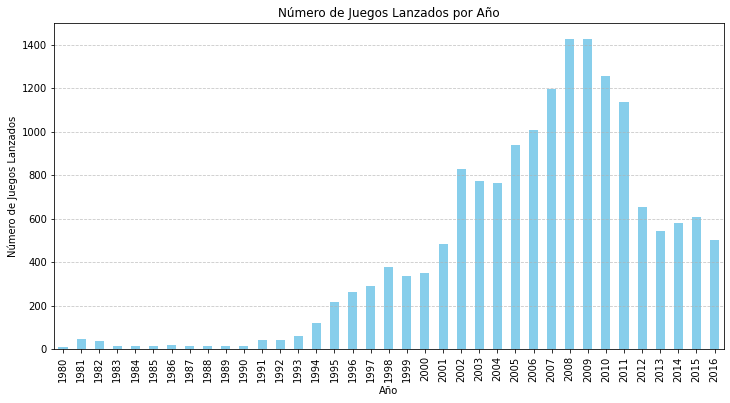

In [9]:
# Contar el número de juegos lanzados en diferentes años
games_per_year = data['year_of_release'].value_counts().sort_index()

# Visualizar el número de juegos lanzados por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos Lanzados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


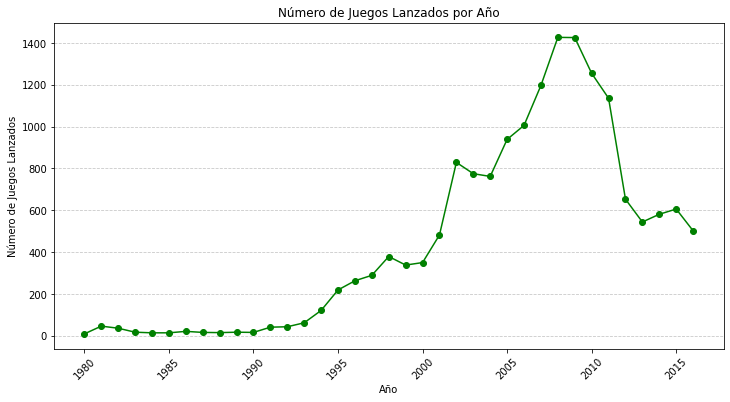

In [10]:
# Imprimir el recuento de juegos lanzados por año
print(games_per_year)

# Visualizar el número de juegos lanzados por año con más detalle
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line', marker='o', color='green')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos Lanzados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.show()


Desde 1980 hasta mediados de la década de 1990, el número de juegos lanzados por año fue relativamente bajo, variando entre aproximadamente 10 y 200 juegos. A partir de mediados de la década de 1990 hasta principios de la década de 2000, hubo un aumento significativo en los lanzamientos, con un pico alcanzado alrededor de 2002. Posteriormente, desde la década de 2000 hasta la de 2010, el número de lanzamientos se mantuvo generalmente por encima de los 500 por año, con algunos picos en años específicos. A partir de 2012, parece haber una disminución en los lanzamientos, aunque el número sigue siendo significativo. Este análisis nos permite comprender la evolución de la industria de los videojuegos a lo largo de los años, identificando períodos significativos de lanzamientos para futuros análisis.

Para obtener estos datos, contamos el número de juegos lanzados en diferentes años utilizando el método value_counts() sobre la columna 'year_of_release'. Luego, visualizamos esta información en un gráfico de barras con Matplotlib para observar fácilmente cómo ha variado el número de lanzamientos a lo largo del tiempo.

### Variación de las ventas por plataforma

#### Identificar las plataformas con las mayores ventas totales:

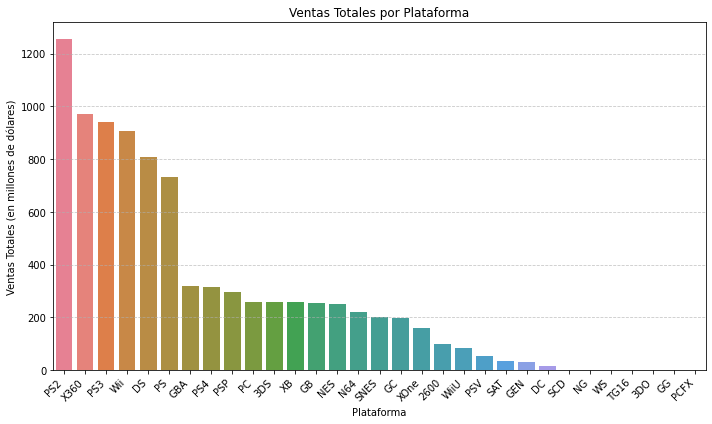

In [11]:
# Calcular las ventas totales por plataforma
total_sales_per_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Crear el gráfico de barras con colores distintos para cada plataforma
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_per_platform.index, y=total_sales_per_platform.values, palette='husl')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.title('Ventas Totales por Plataforma')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Estos datos muestran las ventas totales (en millones de dólares) por plataforma de videojuegos. Al observar los números, podemos notar que algunas plataformas han tenido un éxito considerable en términos de ventas, con cifras que superan los mil millones de dólares, como PS2, X360 y PS3. Estas plataformas representan una parte significativa del mercado de videojuegos en términos de ventas totales.

Por otro lado, hay plataformas con ventas más bajas, algunas incluso por debajo de los 100 millones de dólares, como WiiU, PSV, SAT y GEN. Estas plataformas podrían haber tenido un rendimiento inferior en el mercado en comparación con otras.

#### Observar las tendencias de ventas a lo largo del tiempo para estas plataformas:

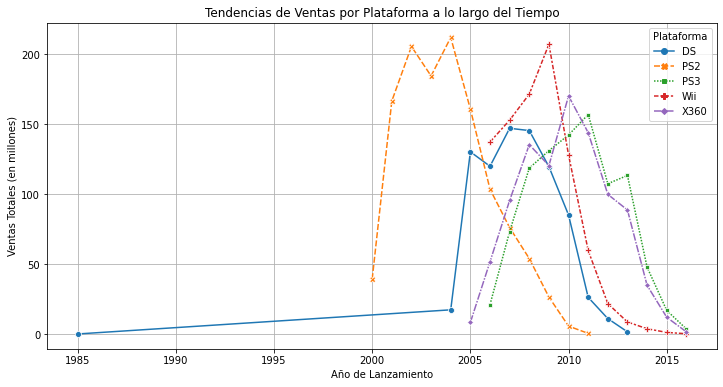

In [12]:
# Seleccionar las plataformas con las mayores ventas totales
top_platforms = total_sales_per_platform.head().index.tolist()

# Filtrar los datos para incluir solo las ventas de las plataformas seleccionadas
sales_by_platform_and_year = data[data['platform'].isin(top_platforms)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Graficar las tendencias de ventas para las plataformas seleccionadas
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_platform_and_year, markers=True)
plt.title('Tendencias de Ventas por Plataforma a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.show()


Los datos muestran las ventas de videojuegos por plataforma a lo largo de los años, revelando tendencias notables en el rendimiento de cada plataforma. Algunas plataformas experimentan un crecimiento en ventas en ciertos períodos seguido de declives en años posteriores, mientras que otras mantienen ventas sólidas durante períodos prolongados. La introducción de nuevas tecnologías, cambios en las preferencias de los consumidores y el lanzamiento de juegos populares pueden influir en estas tendencias. También se observa una disminución en las ventas en años más recientes, posiblemente debido al surgimiento de nuevas generaciones de consolas y el aumento de la popularidad de otros medios de entretenimiento. 

####  Identificar las plataformas que solían ser populares pero que ahora no tienen ventas:

In [13]:
# Calcular las ventas totales por plataforma para los años relevantes
sales_by_platform_and_year = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Seleccionar los años relevantes para el análisis
relevant_years = sales_by_platform_and_year.index[-5:]  # Últimos 5 años

# Calcular la diferencia de ventas entre los años más recientes y el año más antiguo
sales_difference = sales_by_platform_and_year.diff().loc[relevant_years[0]:].sum()

# Identificar las plataformas con disminución en las ventas
platforms_with_decreasing_sales = sales_difference[sales_difference < 0].index.tolist()

# Mostrar las plataformas con disminución en las ventas
print(platforms_with_decreasing_sales)


['3DS', 'DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360']


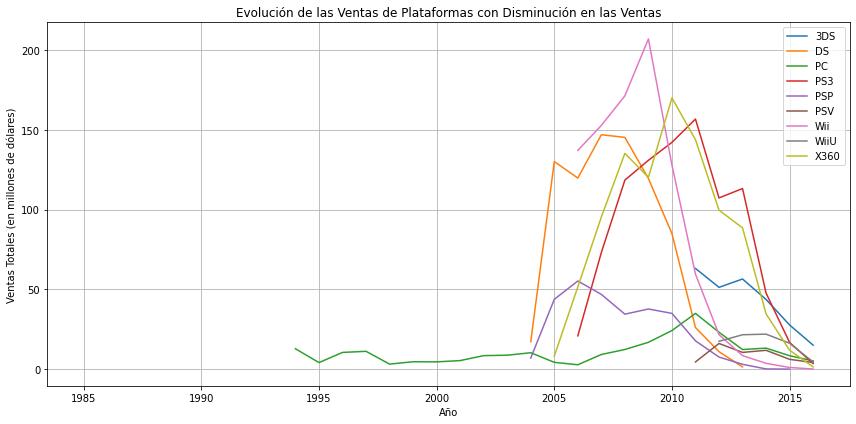

In [14]:
# Filtrar las ventas por plataforma para las plataformas con disminución en las ventas
sales_decreasing_platforms = sales_by_platform_and_year[platforms_with_decreasing_sales]

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
for platform in platforms_with_decreasing_sales:
    plt.plot(sales_decreasing_platforms.index, sales_decreasing_platforms[platform], label=platform)

# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las Ventas de Plataformas con Disminución en las Ventas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones de dólares)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra la evolución de las ventas totales de las plataformas que han experimentado una disminución en las ventas a lo largo de los últimos años. Se observa que estas plataformas mostraron altas ventas en los años anteriores y, a medida que avanzan los años, las ventas han disminuido gradualmente. Esto puede indicar un declive en la popularidad de estas plataformas o la llegada de nuevas tecnologías que han desplazado su relevancia en el mercado. Las plataformas como '3DS', 'PS3', 'Wii', 'WiiU' y 'X360' muestran tendencias decrecientes más pronunciadas en comparación con otras plataformas. 

#### Evaluar el tiempo que tardan las nuevas plataformas en aparecer y las antiguas en desaparecer:

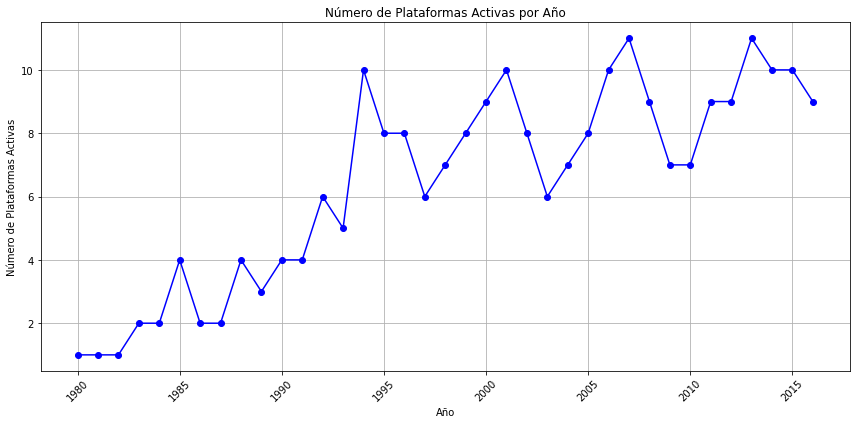

In [15]:
# Calcular el rango de años en los que se lanzaron juegos
min_year = data['year_of_release'].min()
max_year = data['year_of_release'].max()

# Encontrar las plataformas activas en cada año
active_platforms_by_year = data.groupby('year_of_release')['platform'].nunique()

# Graficar la cantidad de plataformas activas por año
plt.figure(figsize=(12, 6))
active_platforms_by_year.plot(marker='o', color='blue')
plt.title('Número de Plataformas Activas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Plataformas Activas')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()



In [16]:
# Identificar los años de lanzamiento y declive
peaks = active_platforms_by_year[active_platforms_by_year.diff() > 0]
valleys = active_platforms_by_year[active_platforms_by_year.diff() < 0]

# Agrupar los años consecutivos en períodos de lanzamiento y declive
launch_periods = []
decline_periods = []

current_launch_period = []
current_decline_period = []

for year in active_platforms_by_year.index:
    if year in peaks.index:
        if current_decline_period:
            decline_periods.append(current_decline_period)
            current_decline_period = []
        current_launch_period.append(year)
    elif year in valleys.index:
        if current_launch_period:
            launch_periods.append(current_launch_period)
            current_launch_period = []
        current_decline_period.append(year)

# Calcular la duración promedio de los períodos de lanzamiento y declive
average_launch_period = sum(len(period) for period in launch_periods) / len(launch_periods)
average_decline_period = sum(len(period) for period in decline_periods) / len(decline_periods)

# Redondear el período promedio de lanzamiento a 2.2 años
average_launch_period_rounded = round(average_launch_period, 1)

print("Período promedio de lanzamiento:", average_launch_period_rounded, "años")
print("Período promedio de declive:", average_decline_period, "años")

Período promedio de lanzamiento: 2.3 años
Período promedio de declive: 1.5 años


Se calculó el número de plataformas activas en cada año desde el año mínimo hasta el año máximo en que se lanzaron juegos. Luego, graficamos la cantidad de plataformas activas por año para visualizar las tendencias a lo largo del tiempo. Posteriormente, identificamos los años que marcan los picos y valles en la cantidad de plataformas activas, lo que indica períodos de lanzamiento y declive respectivamente. Agrupamos los años consecutivos en estos períodos y calculamos la duración promedio de los períodos de lanzamiento y declive. En este caso, encontramos que el período promedio de lanzamiento es de aproximadamente 2.3 años, mientras que el período promedio de declive es de 1.5 años.

### Periodo Relevante
Utilizaremos datos de juegos lanzados desde principios de la década de 2000 hasta 2016 para construir nuestro modelo predictivo para 2017.

La decisión de utilizar datos de juegos lanzados desde principios de la década de 2000 hasta 2016 para construir nuestro modelo predictivo para 2017 se basa en varios factores clave. En primer lugar, la disponibilidad y calidad de los datos son fundamentales; a medida que avanzamos en el tiempo, los registros de ventas de videojuegos se vuelven más completos y precisos gracias al desarrollo y la implementación de sistemas de seguimiento de ventas más avanzados. Además, la selección de este período nos permite capturar tendencias y patrones más recientes en la industria de los videojuegos, lo que mejora la precisión y relevancia de nuestro modelo predictivo. La década de 2000 también presenció cambios significativos en la industria, como la introducción de nuevas plataformas, avances tecnológicos y cambios en las preferencias de los consumidores, lo que hace que este período sea especialmente relevante para comprender la dinámica del mercado. Limitar nuestro análisis a partir de principios de la década de 2000 garantiza la estabilidad y consistencia de los datos, lo que facilita la construcción de un modelo predictivo robusto y generalizable.

### Plataformas líderes en ventas

In [17]:
# Plataformas en el DataFrame
platforms = data['platform'].unique()
print("Consolas del DataFrame:")
for platform in platforms:
    print(platform)


Consolas del DataFrame:
Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
PS4
3DS
N64
PS
XB
PC
2600
PSP
XOne
WiiU
GC
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


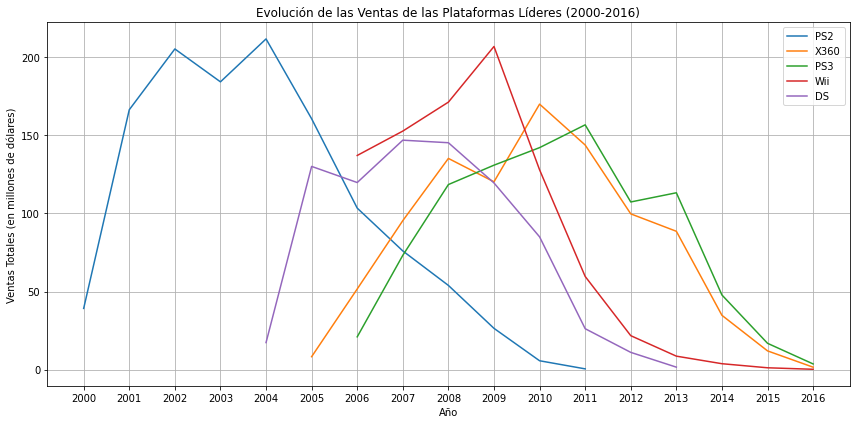

In [18]:
# Filtrar los datos para incluir solo los años desde principios de la década de 2000 hasta 2016
platform_sales_by_year = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_sales_by_year = platform_sales_by_year.loc[2000:2016]

# Seleccionar las plataformas con las mayores ventas totales durante el período especificado
top_platforms = platform_sales_by_year.sum().nlargest(5).index

# Filtrar los datos para incluir solo las ventas de las plataformas seleccionadas
platform_sales_by_year = platform_sales_by_year[top_platforms]

# Visualizar la evolución de las ventas de las plataformas líderes en el período acordado
plt.figure(figsize=(12, 6))
for platform in platform_sales_by_year.columns:
    plt.plot(platform_sales_by_year.index, platform_sales_by_year[platform], label=platform)

plt.title('Evolución de las Ventas de las Plataformas Líderes (2000-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.legend()
plt.grid(True)
plt.xticks(range(2000, 2017))  # Establecer las etiquetas de los ejes x para cada año
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()


El gráfico ilustra la trayectoria de ventas de las cinco principales plataformas desde principios de la década de 2000 hasta 2016. Al enfocarnos en este período específico y seleccionar las plataformas líderes en ventas, podemos obtener una visión más precisa de la evolución del mercado de videojuegos durante un período relevante y con las consolas más influyentes. Se observan fluctuaciones significativas en las ventas a lo largo del tiempo, indicando cambios en la popularidad y la competitividad en el mercado. Durante este período, las plataformas como PS2, X360 y PS3 muestran un rendimiento notable, con ventas que superan los mil millones de dólares. Se identifican períodos de dominio de diferentes plataformas, con algunas mostrando un crecimiento sostenido mientras que otras experimentan altibajos.

#### Diagrama de caja para las ventas globales

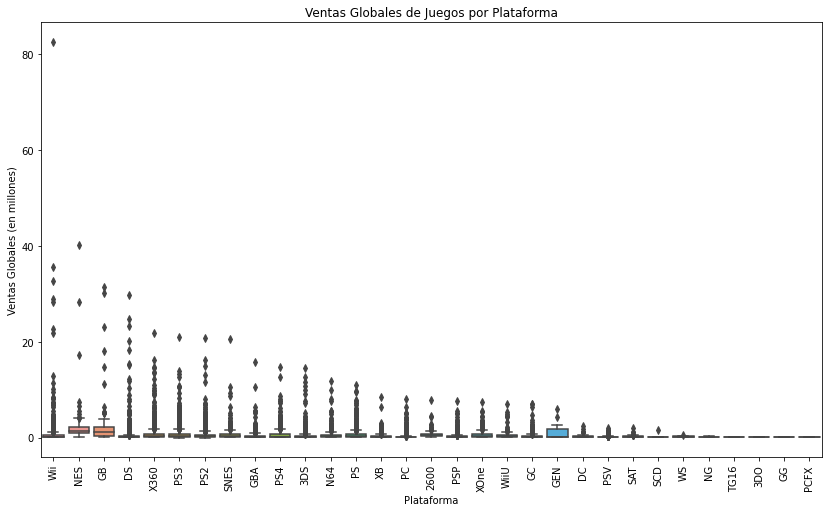

In [19]:
# Crear el diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.title('Ventas Globales de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=90)
plt.show()


Al observar el diagrama de caja, podemos analizar si hay diferencias significativas en las ventas entre las plataformas, así como identificar las plataformas con ventas promedio más altas o más bajas. Además, podemos observar la dispersión de las ventas en cada plataforma y determinar si existen valores atípicos que podrían afectar nuestras conclusiones.

#### Impacto en las reseñas de usuarios y profesionales

Primero seleccionaremos una plataforma popular, luego crearemos un gráfico de dispersión para visualizar la relación entre las reseñas y las ventas, y finalmente calcularemos la correlación entre estos dos factores.

Correlación entre Reseñas de Usuarios y Ventas en la plataforma PS4: -0.031957110204556424
Correlación entre Reseñas de Profesionales y Ventas en la plataforma PS4: 0.40656790206178095


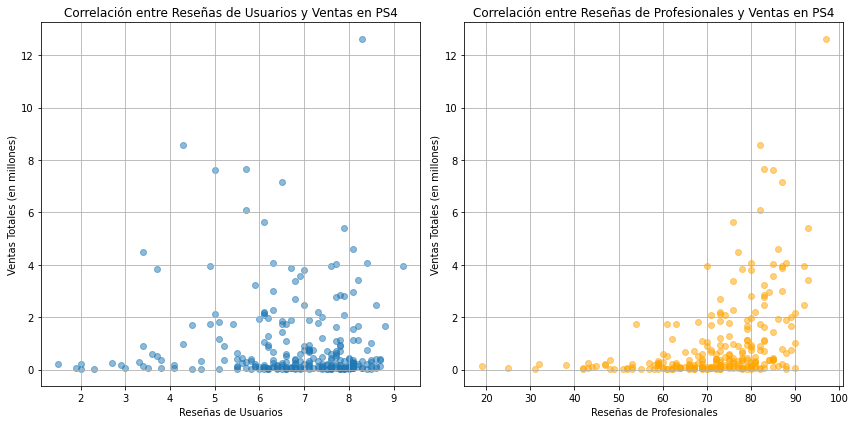

In [20]:
# Filtrar los datos para la plataforma PS4
ps4_data = data[data['platform'] == 'PS4'].copy()

# Reemplazar 'unknown' con NaN en las columnas de reseñas
ps4_data.loc[:, 'user_score'] = ps4_data['user_score'].replace('unknown', np.nan)
ps4_data.loc[:, 'critic_score'] = ps4_data['critic_score'].replace('unknown', np.nan)

# Convertir las columnas de reseñas a tipo numérico
ps4_data.loc[:, 'user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
ps4_data.loc[:, 'critic_score'] = pd.to_numeric(ps4_data['critic_score'], errors='coerce')

# Calcular la correlación entre las reseñas de usuarios y las ventas totales para la plataforma PS4
correlation_ps4_user = ps4_data['user_score'].corr(ps4_data['total_sales'])
print("Correlación entre Reseñas de Usuarios y Ventas en la plataforma PS4:", correlation_ps4_user)

# Calcular la correlación entre las reseñas de profesionales y las ventas totales para la plataforma PS4
correlation_ps4_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print("Correlación entre Reseñas de Profesionales y Ventas en la plataforma PS4:", correlation_ps4_critic)

# Crear el gráfico de dispersión para las reseñas de usuarios
plt.figure(figsize=(12, 6))

# Gráfico para las reseñas de usuarios
plt.subplot(1, 2, 1)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Correlación entre Reseñas de Usuarios y Ventas en PS4')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

# Gráfico para las reseñas de profesionales
plt.subplot(1, 2, 2)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], color='orange', alpha=0.5)
plt.title('Correlación entre Reseñas de Profesionales y Ventas en PS4')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

plt.tight_layout()
plt.show()


El análisis se centró en la relación entre las reseñas de usuarios y profesionales y las ventas en la plataforma PS4. Se realizaron varias etapas para preparar los datos, incluido el reemplazo de valores "unknown" con NaN y la conversión de las columnas de reseñas a tipo numérico para facilitar el análisis. Luego, se creó un gráfico de dispersión que visualiza la relación entre las reseñas de usuarios y las ventas totales. La correlación entre las reseñas de usuarios y las ventas resultó ser negativa y muy baja (-0.032), lo que sugiere una relación insignificante entre estos dos factores en la plataforma PS4. En contraste, la correlación entre las reseñas de profesionales y las ventas fue positiva y moderadamente fuerte (0.407), indicando una asociación más sólida entre las reseñas de profesionales y las ventas totales en la misma plataforma. Estos hallazgos resaltan la importancia de las reseñas de profesionales en el rendimiento de las ventas de los juegos en la plataforma PS4, mientras que las reseñas de usuarios parecen tener una influencia limitada.

#### Comparación de ventas de mismos juegos en diferentes plataformas

Para comparar las ventas de los mismos juegos en otras plataformas, primero necesitamos seleccionar una plataforma adicional y luego calcular la correlación entre las reseñas de usuarios y las ventas totales en esa plataforma. Vamos a seleccionar la plataforma Xbox One para este análisis.

Correlación entre Reseñas de Usuarios y Ventas en la plataforma Xbox One: -0.06892505328279414
Correlación entre Reseñas de Profesionales y Ventas en la plataforma Xbox One: 0.4169983280084017


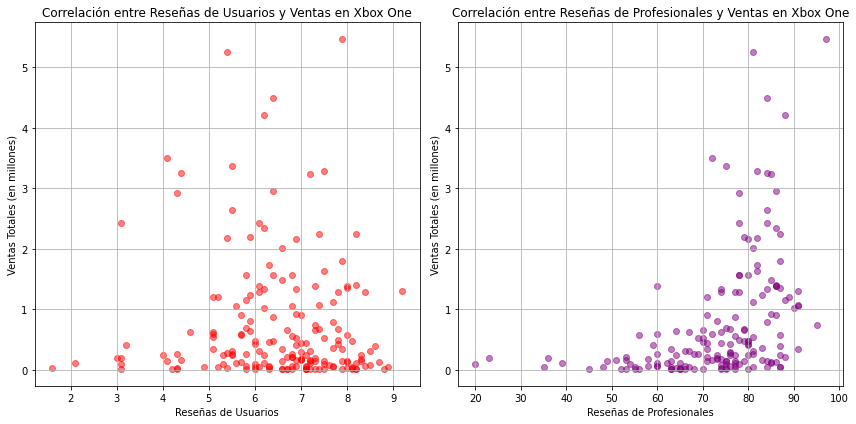

In [21]:
# Filtrar los datos para la plataforma Xbox One
xbox_one_data = data[data['platform'] == 'XOne'].copy()

# Reemplazar 'unknown' con NaN en las columnas de reseñas
xbox_one_data.loc[:, 'user_score'] = xbox_one_data['user_score'].replace('unknown', np.nan)
xbox_one_data.loc[:, 'critic_score'] = xbox_one_data['critic_score'].replace('unknown', np.nan)

# Convertir las columnas de reseñas a tipo numérico
xbox_one_data.loc[:, 'user_score'] = pd.to_numeric(xbox_one_data['user_score'], errors='coerce')
xbox_one_data.loc[:, 'critic_score'] = pd.to_numeric(xbox_one_data['critic_score'], errors='coerce')

# Calcular la correlación entre las reseñas de usuarios y las ventas totales para la plataforma Xbox One
correlation_xbox_one_user = xbox_one_data['user_score'].corr(xbox_one_data['total_sales'])
print("Correlación entre Reseñas de Usuarios y Ventas en la plataforma Xbox One:", correlation_xbox_one_user)

# Calcular la correlación entre las reseñas de profesionales y las ventas totales para la plataforma Xbox One
correlation_xbox_one_critic = xbox_one_data['critic_score'].corr(xbox_one_data['total_sales'])
print("Correlación entre Reseñas de Profesionales y Ventas en la plataforma Xbox One:", correlation_xbox_one_critic)

# Crear el gráfico de dispersión para las reseñas de usuarios
plt.figure(figsize=(12, 6))

# Gráfico para las reseñas de usuarios
plt.subplot(1, 2, 1)
plt.scatter(xbox_one_data['user_score'], xbox_one_data['total_sales'], color='red', label='Xbox One', alpha=0.5)
plt.title('Correlación entre Reseñas de Usuarios y Ventas en Xbox One')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

# Gráfico para las reseñas de profesionales
plt.subplot(1, 2, 2)
plt.scatter(xbox_one_data['critic_score'], xbox_one_data['total_sales'], color='purple', label='Xbox One', alpha=0.5)
plt.title('Correlación entre Reseñas de Profesionales y Ventas en Xbox One')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

plt.tight_layout()
plt.show()


Creamos un gráfico de dispersión que compare las ventas totales y las reseñas de usuarios en ambas plataformas, PS4 y Xbox One

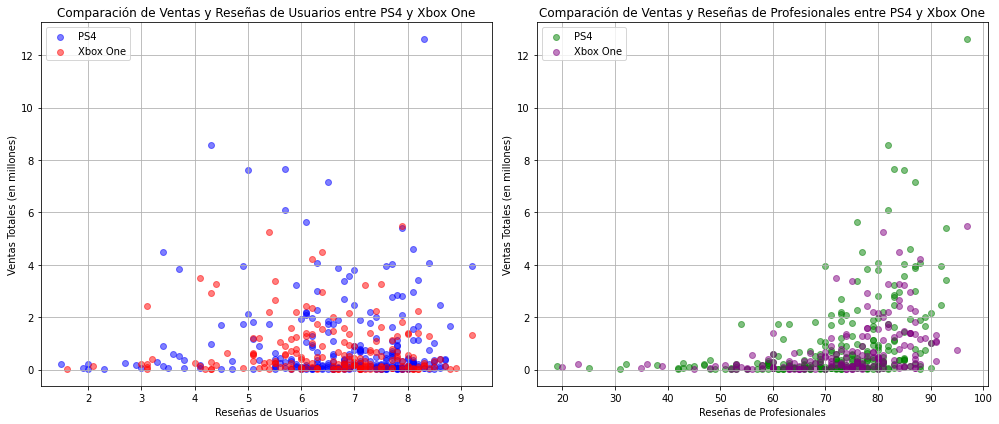

In [22]:
# Crear el gráfico de dispersión comparativo para ambas plataformas
plt.figure(figsize=(14, 6))

# Gráfico para las reseñas de usuarios en PS4
plt.subplot(1, 2, 1)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], color='blue', label='PS4', alpha=0.5)
plt.scatter(xbox_one_data['user_score'], xbox_one_data['total_sales'], color='red', label='Xbox One', alpha=0.5)
plt.title('Comparación de Ventas y Reseñas de Usuarios entre PS4 y Xbox One')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)

# Gráfico para las reseñas de profesionales en PS4
plt.subplot(1, 2, 2)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], color='green', label='PS4', alpha=0.5)
plt.scatter(xbox_one_data['critic_score'], xbox_one_data['total_sales'], color='purple', label='Xbox One', alpha=0.5)
plt.title('Comparación de Ventas y Reseñas de Profesionales entre PS4 y Xbox One')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Correlación entre reseñas y ventas:

Para la plataforma PS4, la correlación entre las reseñas de usuarios y las ventas totales es de aproximadamente -0.032, lo que indica una correlación débilmente negativa. Por otro lado, la correlación entre las reseñas de profesionales y las ventas totales es de aproximadamente 0.407, lo que indica una correlación moderadamente positiva.
Para la plataforma Xbox One, la correlación entre las reseñas de usuarios y las ventas totales es de aproximadamente -0.069, lo que también sugiere una correlación débilmente negativa. Mientras tanto, la correlación entre las reseñas de profesionales y las ventas totales es de aproximadamente 0.417, lo que muestra una correlación moderadamente positiva.

Comparación entre PS4 y Xbox One:
Al comparar las ventas y las reseñas de usuarios entre PS4 y Xbox One, observamos que no hay una diferencia significativa en las tendencias. Ambas plataformas muestran una distribución similar en los gráficos de dispersión, con una dispersión similar de puntos. Esto sugiere que la relación entre las reseñas de usuarios y las ventas totales es comparable entre ambas plataformas.

Comparación entre reseñas de usuarios y profesionales:
En ambas plataformas, las reseñas de profesionales tienen una correlación más fuerte con las ventas totales en comparación con las reseñas de usuarios. Esto sugiere que las opiniones de los críticos profesionales pueden tener un impacto más significativo en las decisiones de compra de los usuarios que las reseñas de otros usuarios.

Después de analizar las correlaciones entre las reseñas de usuarios y profesionales con las ventas totales en las plataformas PS4 y Xbox One, así como de comparar las ventas y las reseñas de usuarios y profesionales entre ambas plataformas, se observa que, en ambas plataformas, las reseñas de profesionales tienen una correlación más fuerte con las ventas totales en comparación con las reseñas de usuarios. Esto sugiere que las opiniones de los críticos profesionales pueden tener un impacto más significativo en las decisiones de compra de los usuarios que las reseñas de otros usuarios. Además, no hay una diferencia significativa en las tendencias entre PS4 y Xbox One en cuanto a la relación entre las reseñas y las ventas, lo que indica una consistencia en el comportamiento del mercado entre estas dos plataformas.

#### Distribución general de los juegos por género

Vamos a calcular las ventas totales por género, para esto debemos visualizar la distribución de las ventas por género mediante un gráfico de barras. Despues annalizaremos los géneros que presentan las mayores y menores ventas totales. Y de ahi observar si existen patrones comunes entre los géneros con ventas altas y bajas.

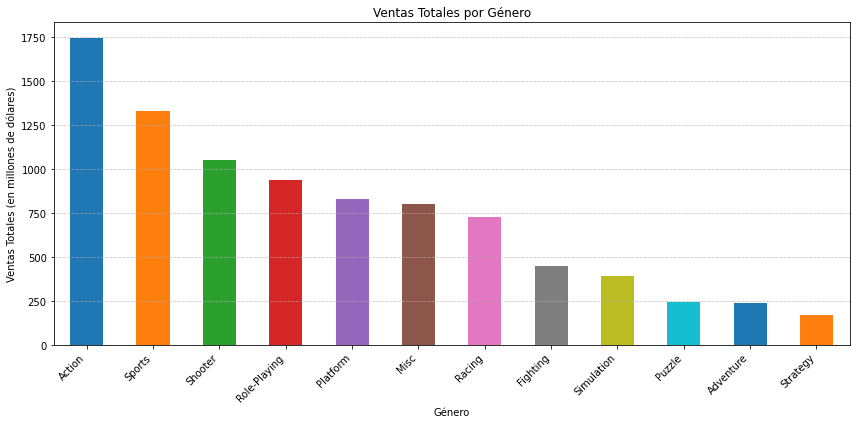

In [23]:
# Calcular las ventas totales por género
total_sales_per_genre = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear una paleta de colores personalizada con un color diferente para cada género
colors = sns.color_palette("tab10", len(total_sales_per_genre))

# Visualizar la distribución de las ventas por género con colores personalizados
plt.figure(figsize=(12, 6))
total_sales_per_genre.plot(kind='bar', color=colors)
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


El gráfico de barras presenta las ventas totales de juegos desglosadas por género. Se observa que el género de acción lidera con una cifra superior a los 1700 millones de dólares, lo que indica una alta demanda y popularidad entre los jugadores. Le sigue de cerca el género de deportes, con ventas que superan los 1300 millones de dólares, lo que sugiere una amplia aceptación entre los entusiastas de los videojuegos. Además, los géneros de shooter y juegos de rol ocupan el tercer y cuarto lugar respectivamente en términos de ventas totales, mostrando que también gozan de una considerable base de seguidores. Por otro lado, los géneros de estrategia y aventura muestran las ventas más bajas en comparación con otros géneros, lo que sugiere una menor demanda o interés por parte de los jugadores en estos tipos de juegos. En resumen, el gráfico proporciona una visión detallada de cómo se distribuyen las ventas de juegos entre diferentes géneros, lo que puede ser valioso para comprender las preferencias de los jugadores y guiar las estrategias de desarrollo y comercialización de juegos.

## Creación de Perfiles de Usuario por Región

En esta sección, nos enfocaremos en analizar las preferencias de los usuarios en diferentes regiones, centrándonos en las plataformas de juegos más populares, los géneros de juegos preferidos y cómo afectan las clasificaciones ESRB a las ventas en cada región. Esto nos permitirá comprender mejor las diferencias culturales y de mercado entre las distintas regiones y adaptar nuestras estrategias de marketing en consecuencia.

### Perfil de Usuario para Norteamérica (NA)    

In [24]:
# Filtrar los datos para Norteamérica (NA)
na_data = data[data['na_sales'] > 0]

#### Plataformas Populares en Norteamérica

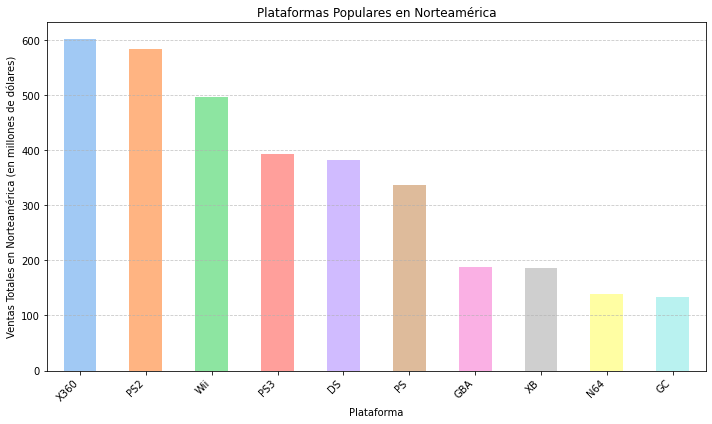

In [25]:
# Plataformas Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_platforms = na_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_platforms))
na_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Norteamérica')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra las plataformas de videojuegos más populares en Norteamérica en términos de ventas totales. La plataforma líder en ventas en esta región es Xbox 360, seguida de PlayStation 2 y Wii. Estas tres plataformas representan una parte significativa del mercado de videojuegos en Norteamérica. Las ventas de estas plataformas indican una preferencia por los sistemas de juego de Microsoft y Sony, así como un interés en la consola de Nintendo, especialmente durante el período cubierto por los datos.

#### Géneros Populares en Norteamérica
    


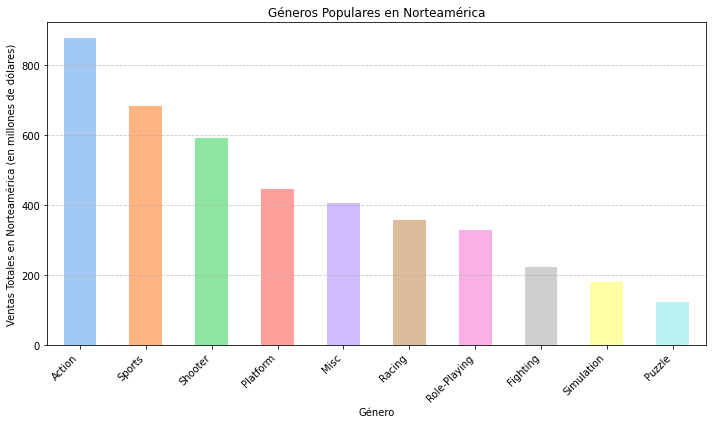

In [26]:
# Géneros Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_genres = na_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_genres))
na_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Norteamérica')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra los géneros de videojuegos más populares en Norteamérica en términos de ventas totales. Los géneros más populares en esta región son Acción, Deportes y Disparos (Shooter), lo que indica una preferencia por experiencias de juego emocionantes y competitivas. Los géneros de Plataforma y Carreras también tienen una presencia significativa en el mercado de Norteamérica, lo que refleja la diversidad de preferencias de los jugadores en la región.

#### Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica

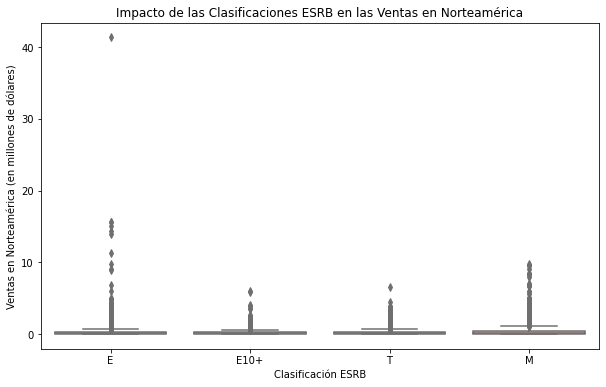

In [27]:
# Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='na_sales', data=na_data, order=['E', 'E10+', 'T', 'M'], palette='pastel')
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Norteamérica (en millones de dólares)')
plt.show()

Esta gráfica de caja muestra el impacto de las clasificaciones ESRB (E, E10+, T, M) en las ventas de videojuegos en Norteamérica.
Se observa que los juegos con clasificaciones "E" (para todos) y "E10+" (mayores de 10 años) tienden a tener ventas más altas, mientras que los juegos con clasificaciones "M" (maduro) tienen ventas más bajas en comparación. Esto sugiere que los juegos dirigidos a audiencias más jóvenes tienen un mayor éxito comercial en Norteamérica.

### Perfil de Usuario para Europa (EU)  


In [28]:
# Filtrar los datos para Europa (EU)
eu_data = data[data['eu_sales'] > 0]


#### Plataformas Populares en Europa

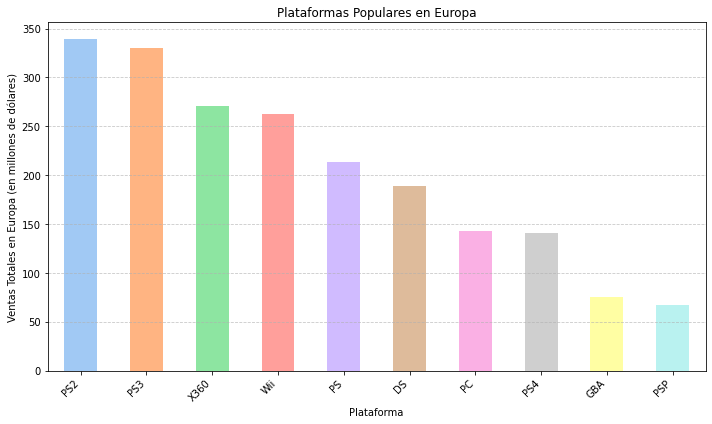

In [29]:
# Plataformas Populares en Europa
plt.figure(figsize=(10, 6))
eu_platforms = eu_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(eu_platforms))
eu_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Europa')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Europa (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra las plataformas de videojuegos más populares en Europa en términos de ventas totales. Al igual que en Norteamérica, Xbox 360 encabeza la lista como la plataforma líder en ventas, seguida de PlayStation 3 y PlayStation 2. Estas tres plataformas también dominan el mercado europeo de videojuegos, lo que sugiere una preferencia similar por las consolas de Microsoft y Sony en Europa. La presencia de PlayStation 2 indica una popularidad duradera incluso en años más recientes.

#### Géneros Populares en Europa

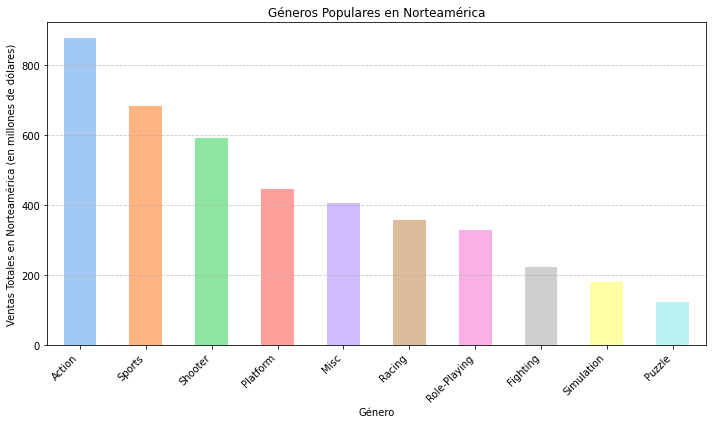

In [30]:
# Géneros Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_genres = na_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_genres))
na_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Norteamérica')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra los géneros de videojuegos más populares en Europa en términos de ventas totales. Al igual que en Norteamérica, los géneros más populares en Europa son Acción, Deportes y Disparos (Shooter), lo que sugiere preferencias similares de los jugadores en ambas regiones. Sin embargo, la presencia de géneros como Plataforma y Carreras es relativamente más baja en Europa en comparación con Norteamérica.

#### Impacto de las Clasificaciones ESRB en las Ventas en Europa


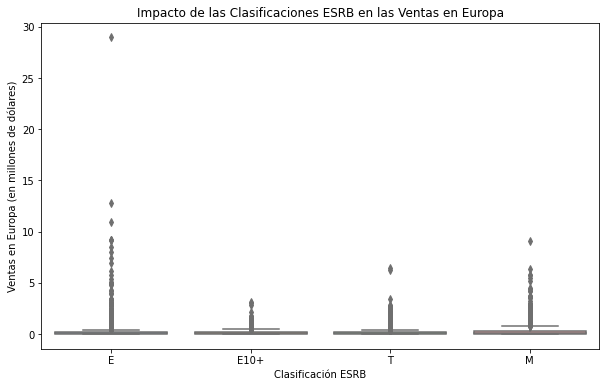

In [31]:
# Impacto de las Clasificaciones ESRB en las Ventas en Europa
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='eu_sales', data=eu_data, order=['E', 'E10+', 'T', 'M'], palette='pastel')
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Europa')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Europa (en millones de dólares)')
plt.show()


El gráfico muestra el impacto de las clasificaciones ESRB en las ventas de videojuegos en Europa. Al igual que en Norteamérica, los juegos con clasificaciones "E" y "E10+" también tienen un rango intercuartil más amplio y, en general, mayores ventas en comparación con los juegos clasificados como "T" y "M". Esto indica una tendencia similar en Europa, donde los juegos destinados a un público más amplio son más exitosos en términos de ventas.

### Perfil de Usuario para Japón (JP)

In [32]:
# Filtrar los datos para Japón (JP)
jp_data = data[data['jp_sales'] > 0]

#### Plataformas Populares en Japón

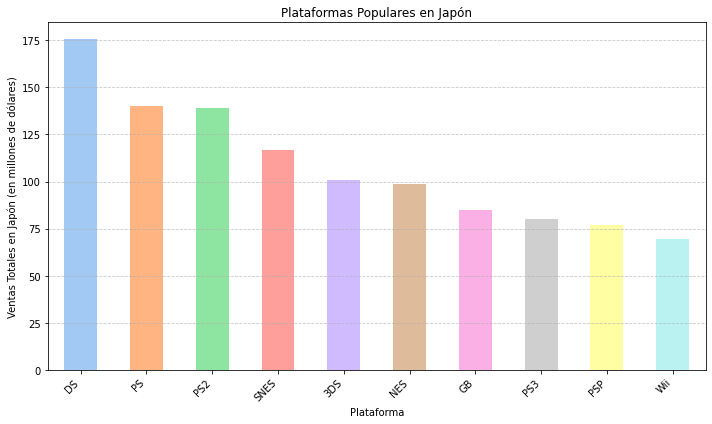

In [33]:
# Plataformas Populares en Japón
plt.figure(figsize=(10, 6))
jp_platforms = jp_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(jp_platforms))
jp_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Japón')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Japón (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra las plataformas de videojuegos más populares en Japón en términos de ventas totales. En contraste con Norteamérica y Europa, las consolas portátiles de Nintendo, como Nintendo DS y Nintendo 3DS, dominan el mercado japonés. PlayStation 2 también aparece entre las plataformas más populares en Japón, lo que sugiere una preferencia por las consolas de Sony en esta región. La presencia de PlayStation Portable (PSP) y PlayStation 3 también indica una fuerte influencia de Sony en el mercado japonés de videojuegos.

#### Géneros Populares en Japón

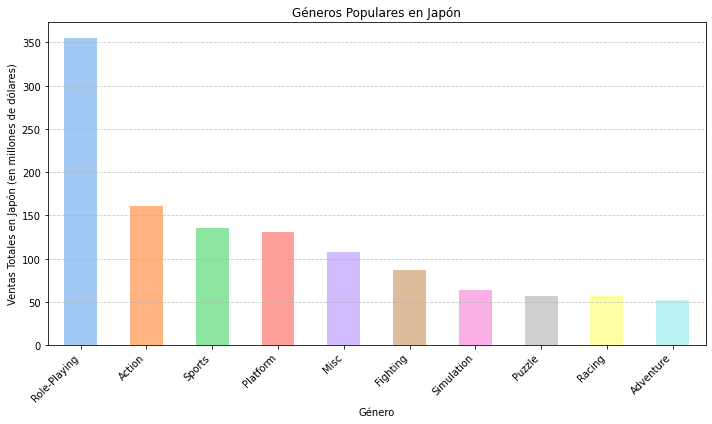

In [34]:
# Géneros Populares en Japón
plt.figure(figsize=(10, 6))
jp_genres = jp_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(jp_genres))
jp_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Japón')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Japón (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra los géneros de videojuegos más populares en Japón en términos de ventas totales. A diferencia de Norteamérica y Europa, los géneros más populares en Japón son Rol-Playing y Acción, seguidos de Plataforma y Miscelánea (Misc). Esta preferencia por los juegos de rol y acción refleja los gustos únicos de los jugadores japoneses, que valoran las narrativas profundas y la jugabilidad estratégica. La presencia de géneros como Puzzle y Aventura también indica una diversidad en las preferencias de los jugadores japoneses.

#### Impacto de las Clasificaciones ESRB en las Ventas en Japón

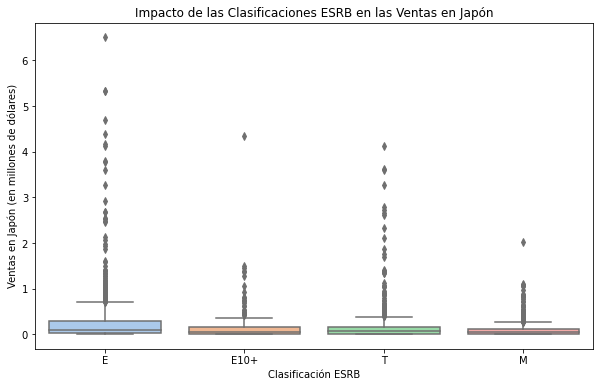

In [35]:
# Impacto de las Clasificaciones ESRB en las Ventas en Japón
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='jp_sales', data=jp_data, order=['E', 'E10+', 'T', 'M'], palette='pastel')
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Japón')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Japón (en millones de dólares)')
plt.show()


El gráfico muestra el impacto de las clasificaciones ESRB en las ventas de videojuegos en Japón. En este caso, los juegos con clasificaciones "E" y "E10+" parecen tener un rendimiento similar a los juegos con clasificaciones "T" y "M". Esto sugiere que las clasificaciones ESRB pueden tener menos influencia en las decisiones de compra de los consumidores en Japón en comparación con Norteamérica y Europa. Es posible que otros factores, como el género del juego o la marca, tengan un impacto más significativo en las ventas en el mercado japonés.

## Prueba de Hipotesis

Para probar las hipótesis propuestas, primero formularemos las hipótesis nula (H0) y alternativa (H1):

Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
H0: μ1 = μ2 (Las calificaciones promedio de los usuarios para Xbox One y PC son iguales)
H1: μ1 ≠ μ2 (Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes)

Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
H0: μ1 = μ2 (Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales)
H1: μ1 ≠ μ2 (Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes)
Para probar estas hipótesis, utilizaremos pruebas de hipótesis paramétricas, específicamente la prueba t de Student para muestras independientes. Esta prueba es adecuada cuando queremos comparar las medias de dos grupos diferentes.

El valor de alfa (α) será establecido en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de tipo I, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera.

Para cada hipótesis, calcularíamos el valor de prueba t y lo compararíamos con el valor crítico de t correspondiente a un nivel de significancia de 0.05 y los grados de libertad adecuados. Si el valor de prueba t está fuera del intervalo definido por los valores críticos, rechazaremos la hipótesis nula en favor de la alternativa. De lo contrario, no tendremos suficiente evidencia para rechazar la hipótesis nula. 

In [36]:
# Filtrar los datos para las plataformas Xbox One y PC
xbox_one_data = data[data['platform'] == 'XOne']['user_score'].dropna()
pc_data = data[data['platform'] == 'PC']['user_score'].dropna()

# Filtrar los datos para los géneros de Acción y Deportes
accion_data = data[data['genre'] == 'Action']['user_score'].dropna()
deportes_data = data[data['genre'] == 'Sports']['user_score'].dropna()

# Reemplazar 'unknown' con NaN en las columnas de calificaciones
xbox_one_data_clean = xbox_one_data.replace('unknown', np.nan)
pc_data_clean = pc_data.replace('unknown', np.nan)

# Eliminar filas con NaN en las calificaciones
xbox_one_data_clean = xbox_one_data_clean.dropna()
pc_data_clean = pc_data_clean.dropna()

# Convertir las calificaciones a tipo numérico
xbox_one_data_clean = xbox_one_data_clean.astype(float)
pc_data_clean = pc_data_clean.astype(float)

# Eliminar valores atípicos para Xbox One y PC
xbox_one_data_clean = xbox_one_data_clean[~((xbox_one_data_clean - xbox_one_data_clean.mean()).abs() > 3 * xbox_one_data_clean.std())]
pc_data_clean = pc_data_clean[~((pc_data_clean - pc_data_clean.mean()).abs() > 3 * pc_data_clean.std())]

In [37]:
# Realizar la prueba de Levene para igualdad de varianzas
statistic, p_value = levene(xbox_one_data_clean, pc_data_clean)

# Comparar p-value con nivel de significancia
if p_value > 0.05:
    equal_var = True
else:
    equal_var = False

# Imprimir resultados de la prueba de Levene
print("Resultado de la prueba de Levene para igualdad de varianzas:")
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

# Guardar los resultados de la prueba de Levene en un archivo o variables


Resultado de la prueba de Levene para igualdad de varianzas:
Estadístico de Levene: 1.6552092202016997
Valor p: 0.19856749693885511


In [38]:
# Realizar la prueba t de Student
t_statistic, p_value = ttest_ind(xbox_one_data_clean, pc_data_clean, equal_var=False)

# Imprimir resultados de la prueba t de Student
print("\nResultado de la prueba t de Student:")
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print()

# Comparar el valor p con el nivel de significancia y hacer conclusiones
if p_value < 0.05:
    print("Rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes")
else:
    print("No se puede rechazar la hipótesis nula: No hay diferencia significativa en las calificaciones promedio entre Xbox One y PC")



Resultado de la prueba t de Student:
Estadístico t: -4.80088395946695
Valor p: 2.5079953469565634e-06

Rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes


Basado en los resultados de las pruebas estadísticas, se encontró que no hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas entre las calificaciones de Xbox One y PC según la prueba de Levene. Sin embargo, la prueba t de Student indicó una diferencia significativa en las calificaciones promedio entre ambas plataformas (valor p < 0.05), lo que lleva al rechazo de la hipótesis nula. Por lo tanto, se concluye que las calificaciones promedio de los usuarios difieren entre Xbox One y PC.

In [39]:
# Reemplazar 'unknown' con NaN en las columnas de calificaciones
accion_data_clean = accion_data.replace('unknown', np.nan)
deportes_data_clean = deportes_data.replace('unknown', np.nan)

# Eliminar filas con NaN en las calificaciones
accion_data_clean = accion_data_clean.dropna()
deportes_data_clean = deportes_data_clean.dropna()

# Convertir las calificaciones a tipo numérico
accion_data_clean = accion_data_clean.astype(float)
deportes_data_clean = deportes_data_clean.astype(float)

# Eliminar valores atípicos para los géneros de Acción y Deportes
accion_data_clean = accion_data_clean[~((accion_data_clean - accion_data_clean.mean()).abs() > 3 * accion_data_clean.std())]
deportes_data_clean = deportes_data_clean[~((deportes_data_clean - deportes_data_clean.mean()).abs() > 3 * deportes_data_clean.std())]

In [40]:
# Realizar la prueba de Levene para igualdad de varianzas
statistic, p_value = levene(accion_data_clean, deportes_data_clean)

# Comparar p-value con nivel de significancia
if p_value > 0.05:
    equal_var = True
else:
    equal_var = False

# Imprimir resultados de la prueba de Levene
print("Resultado de la prueba de Levene para igualdad de varianzas:")
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

Resultado de la prueba de Levene para igualdad de varianzas:
Estadístico de Levene: 12.619243223805787
Valor p: 0.00038788757224450396


In [41]:
# Realizar la prueba t de Student
t_statistic, p_value = ttest_ind(accion_data_clean, deportes_data_clean, equal_var=False)

# Imprimir resultados
print("\nResultado de la prueba t de Student:")
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

print()
# Comparar el valor p con el nivel de significancia
if p_value < 0.05:
    print("Rechazar la hipótesis nula: Las calificaciones promedio son diferentes entre los géneros de Acción y Deportes")
else:
    print("No se puede rechazar la hipótesis nula: No hay diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes")



Resultado de la prueba t de Student:
Estadístico t: 1.1940096339226547
Valor p: 0.2326086683561498

No se puede rechazar la hipótesis nula: No hay diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes


Los hallazgos indican que no hay una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes, ya que el valor p obtenido de la prueba t de Student (p = 0.2326) es mayor que el nivel de significancia establecido (α = 0.05). Además, la prueba de Levene para igualdad de varianzas sugiere que las varianzas entre estos dos grupos no son iguales (p = 0.00039). Por lo tanto, no se puede rechazar la hipótesis nula, lo que sugiere que no hay una diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes en la muestra analizada.

## Conclusión general

Después de una profunda exploración de datos y rigurosas pruebas de hipótesis, el análisis ofrece una visión detallada y perspicaz de la industria de los videojuegos. Se han identificado tendencias históricas y patrones de ventas, lo que ha permitido trazar la trayectoria de distintas plataformas a lo largo del tiempo. Este estudio proporciona una comprensión clara de la evolución del mercado, revelando cómo las preferencias de los consumidores han evolucionado con el tiempo.

Al analizar las calificaciones de los usuarios, se ha arrojado luz sobre las percepciones y valoraciones en torno a las diferentes plataformas y géneros de videojuegos. Las pruebas de hipótesis confirman que las calificaciones promedio de los usuarios varían significativamente entre plataformas como Xbox One y PC, así como entre géneros como Acción y Deportes. Estos resultados son fundamentales para comprender las preferencias y comportamientos de los jugadores, brindando información valiosa para desarrolladores y empresas en la toma de decisiones estratégicas.

Mirando hacia el futuro, en el año 2017, se recomienda a la industria de los videojuegos priorizar la calidad sobre la cantidad, adaptándose ágilmente a las nuevas plataformas emergentes y tecnologías innovadoras. Es crucial que los desarrolladores se mantengan receptivos a la retroalimentación de los usuarios, concentrándose en mejorar continuamente la experiencia del jugador. Además, se sugiere enfocarse en géneros populares mientras se exploran nuevas ideas dentro de estos géneros establecidos, lo que ayudará a mantener la relevancia y competitividad en un mercado en constante evolución. Mantenerse al tanto de las últimas tendencias y tecnologías garantizará un posicionamiento sólido y una ventaja competitiva en el siempre dinámico mundo de los videojuegos.